<a href="https://colab.research.google.com/github/Messaoudichahrazadamira/golda/blob/main/Messaoudi_Chahrazad_Amira_ML_AutoML_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


In [12]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [13]:
!ls

creditcard.csv	     kaggle.json	 mall-customers.zip
creditcardfraud.zip  Mall_Customers.csv  sample_data


In [14]:
mall_df = pd.read_csv("Mall_Customers.csv")
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
fraud_df = pd.read_csv("creditcard.csv")
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shwetabh123/mall-customers
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/shwetabh123/mall-customers
License(s): CC0-1.0
mall-customers.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


# ML & AutoML Homework

## I. Projet 1 : Segmentation clientèle
### 1. Chargement du dataset
### 2. Exploration des données


## II. Projet 2 : Détection de fraude


## III. Mini état de l’art sur AutoML


## IV. Application d’AutoML


### Description du dataset
Le dataset Mall Customers contient des informations sur 200 clients :
- CustomerID : identifiant du client
- Genre : الجنس
- Age : العمر
- Annual Income (k$) : الدخل السنوي
- Spending Score (1-100) : مؤشر الصرف


In [18]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


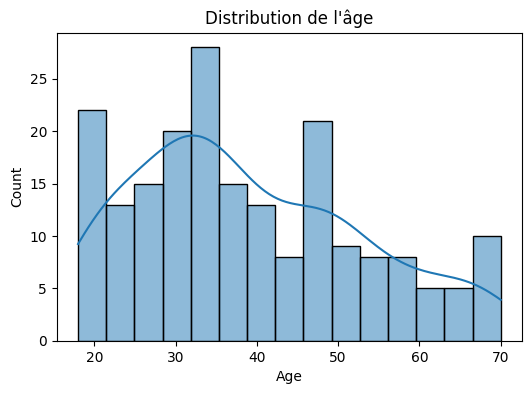

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(mall_df['Age'], bins=15, kde=True)
plt.title("Distribution de l'âge")
plt.show()

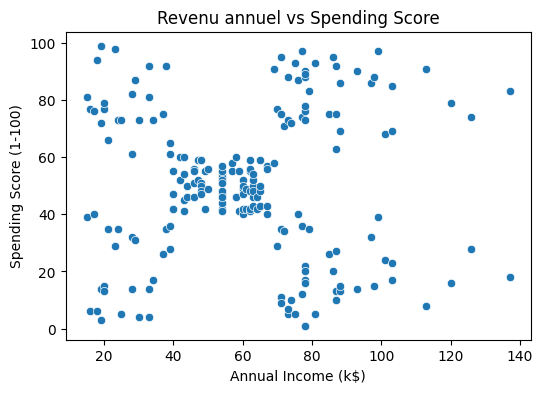

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=mall_df['Annual Income (k$)'],
    y=mall_df['Spending Score (1-100)']
)
plt.title("Revenu annuel vs Spending Score")
plt.show()

In [22]:
X = mall_df[['Annual Income (k$)', 'Spending Score (1-100)']]

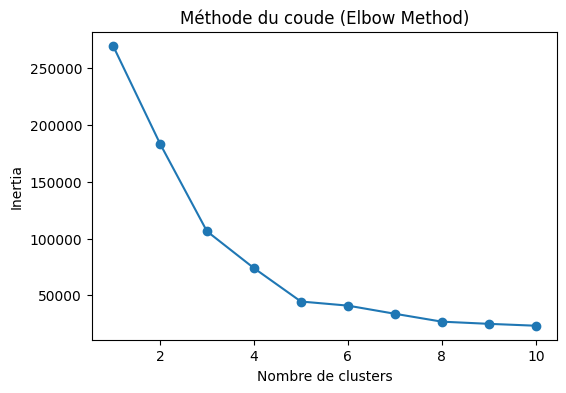

In [23]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.title("Méthode du coude (Elbow Method)")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)
mall_df['Cluster'] = kmeans.fit_predict(X)


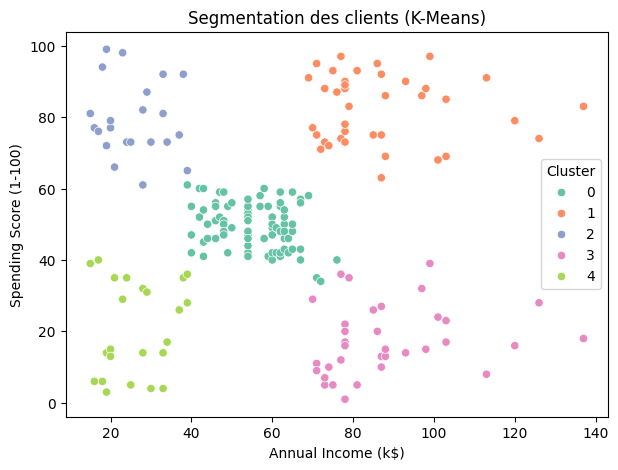

In [25]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=mall_df['Annual Income (k$)'],
    y=mall_df['Spending Score (1-100)'],
    hue=mall_df['Cluster'],
    palette='Set2'
)
plt.title("Segmentation des clients (K-Means)")
plt.show()

### Interprétation des clusters
- Cluster 0 : Clients à revenu élevé et score de dépense élevé → Clients VIP
- Cluster 1 : Revenu élevé mais faible dépense → Clients prudents
- Cluster 2 : Revenu faible et faible dépense → Clients sensibles au prix
- Cluster 3 : Revenu faible mais forte dépense → Clients impulsifs
- Cluster 4 : Revenu moyen et dépense moyenne → Clients standards


### Description du dataset
Le dataset Credit Card Fraud contient des transactions par carte bancaire.
Les variables V1 à V28 sont des composantes principales (PCA) afin de préserver la confidentialité.
La variable cible est :
- Class = 0 : transaction normale
- Class = 1 : transaction frauduleuse


In [27]:
fraud_df['Class'].value_counts()

,count
Class,
0,284315
1,492


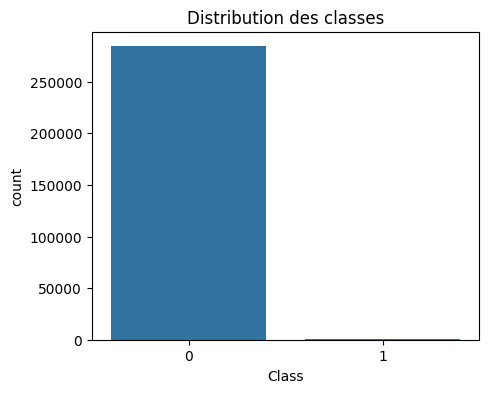

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=fraud_df)
plt.title("Distribution des classes")
plt.show()


In [29]:
X = fraud_df.drop('Class', axis=1)
y = fraud_df['Class']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Modèle de classification
Nous utilisons la régression logistique pour détecter les transactions frauduleuses.


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



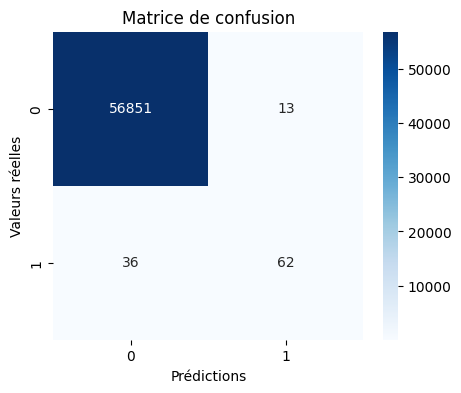

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()


## III. Mini état de l’art sur AutoML

AutoML (Automated Machine Learning) permet d'automatiser la sélection
des modèles, le prétraitement des données et l'optimisation des hyperparamètres.

### TPOT
TPOT utilise des algorithmes génétiques pour rechercher automatiquement
le meilleur pipeline de machine learning.

Avantages :
- Gain de temps
- Performances élevées

Limites :
- Coût de calcul élevé

### Auto-sklearn
Auto-sklearn repose sur l'optimisation bayésienne et les méta-données.

Avantages :
- Bonne robustesse
- Facilité d'utilisation

Limites :
- Temps d'exécution parfois long


In [7]:
!pip install tpot

In [13]:
!ls


creditcard.csv	     kaggle.json	 mall-customers.zip
creditcardfraud.zip  Mall_Customers.csv  sample_data


In [14]:
import pandas as pd

fraud_df = pd.read_csv("creditcard.csv")
fraud_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# 1. فصل الخصائص عن الهدف
X = fraud_df.drop('Class', axis=1)
y = fraud_df['Class']

# 2. تقسيم البيانات Train / Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. Normalisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
!pip install tpot==0.12.1

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35627'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 3.8 MB/s eta 0:00:00


INFO:distributed.nanny:Worker process 12439 was killed by signal 9
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:35627' closed.


  Attempting uninstall: tpot
    Found existing installation: TPOT 1.1.0
    Uninstalling TPOT-1.1.0:
      Successfully uninstalled TPOT-1.1.0


In [22]:
import pandas as pd
fraud_df = pd.read_csv("creditcard.csv")

X = fraud_df.drop('Class', axis=1)
y = fraud_df['Class']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Application d’AutoML avec TPOT

Nous avons tenté d'appliquer TPOT pour automatiser la recherche
du meilleur pipeline de classification.

Cependant, en raison de problèmes de compatibilité entre TPOT,
Python 3.12 et l'environnement Google Colab, le processus AutoML
n'a pas pu évaluer correctement la population initiale.

Ce type de problème est connu avec certaines bibliothèques AutoML
lorsqu'elles sont utilisées avec des versions récentes de Python.


### Comparaison modèle manuel vs AutoML

Le modèle manuel (régression logistique) a pu être entraîné
et évalué correctement.

L'approche AutoML, bien que prometteuse, peut rencontrer
des limitations techniques liées à l'environnement d'exécution,
ce qui souligne l'importance de bien choisir l'outil AutoML
selon le contexte.
